In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [29]:
df_ukf = pd.read_csv("/home/arko/Projects/UKF_Branch/Unscented-Kalman-Filter/build/out.txt", delimiter="\t")
df_ekf = pd.read_csv("/home/arko/Projects/Extended-Kalman-Filter/build/output.txt", delimiter="\t", header=None)

In [3]:
df_ukf.head()

,time_stamp,px_state,py_state,v_state,yaw_angle_state,yaw_rate_state,sensor_type,NIS,px_measured,py_measured,px_ground_truth,py_ground_truth,vx_ground_truth,vy_ground_truth
0,1477010443000000,0.312243,0.580340,0.00000,0.000000e+00,0.000000e+00,lidar,2.043456e-320,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000
1,1477010443050000,0.695668,0.625396,5.12478,-1.275820e-17,-1.710020e-17,radar,1.320370e+02,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797
2,1477010443100000,1.107400,0.530172,5.15347,-1.827570e-01,-1.466490e-02,lidar,1.107970e+00,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390
3,1477010443150000,1.268260,0.525849,5.18600,2.849100e-02,2.387650e-02,radar,1.699500e+00,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778
4,1477010443200000,1.576720,0.565064,5.20009,6.152460e-02,3.298090e-02,lidar,6.776130e-01,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960


In [42]:
df_ekf.columns = ['px_state', 'py_state', 'vx_state', 'vy_state', 'px_measured', 'py_measured', 'px_ground_truth', 'py_ground_truth', 'vx_ground_truth', 'vy_ground_truth']
df_ekf.head()

,px_state,py_state,vx_state,vy_state,px_measured,py_measured,px_ground_truth,py_ground_truth,vx_ground_truth,vy_ground_truth
0,0.312243,0.580340,0.00000,0.00000,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000
1,0.778958,0.720842,2.14624,3.95238,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797
2,0.840624,0.720743,2.96226,3.49982,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390
3,1.103740,0.471915,5.25135,1.65948,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778
4,1.456820,0.603592,5.56423,1.44586,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960


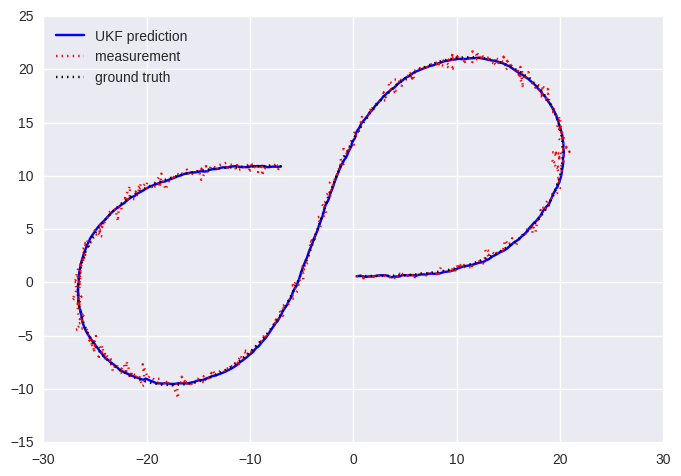

In [32]:
plt.plot(df_ukf.px_state, df_ukf.py_state, '-b', label='UKF prediction')
plt.plot(df_ukf.px_measured, df_ukf.py_measured, ':r', label='measurement')
plt.plot(df_ukf.px_ground_truth, df_ukf.py_ground_truth, ':k', label='ground truth')
plt.legend(loc=0)

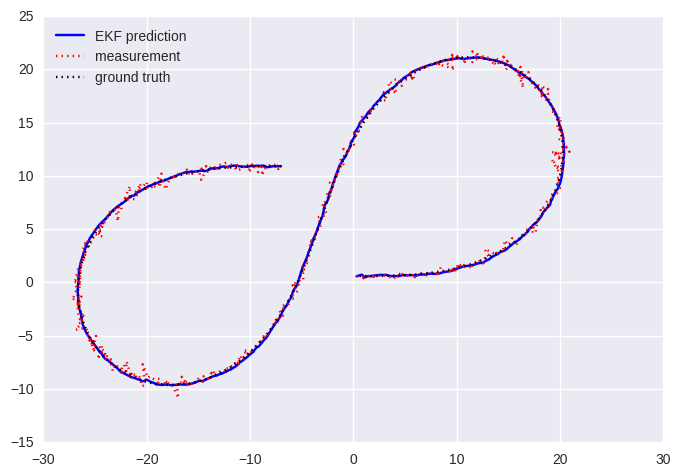

In [36]:
plt.plot(df_ekf.px_state, df_ekf.py_state, '-b', label='EKF prediction')
plt.plot(df_ekf.px_measured, df_ekf.py_measured, ':r', label='measurement')
plt.plot(df_ekf.px_ground_truth, df_ekf.py_ground_truth, ':k', label='ground truth')
plt.legend(loc=0)

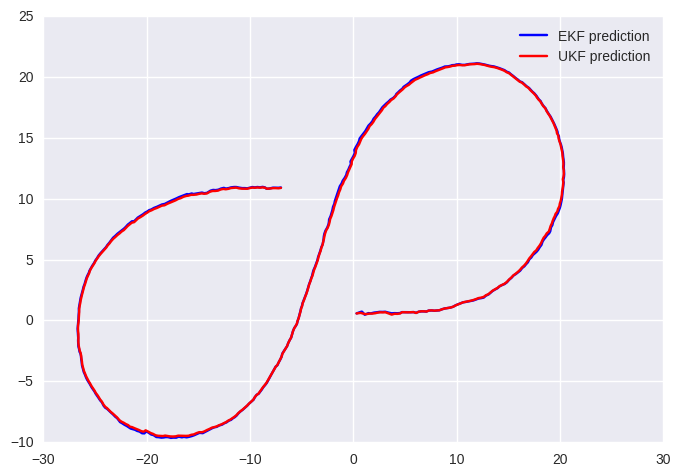

In [38]:
plt.plot(df_ekf.px_state, df_ekf.py_state, '-b', label='EKF prediction')
plt.plot(df_ukf.px_state, df_ukf.py_state, '-r', label='UKF prediction')
plt.legend(loc=0)

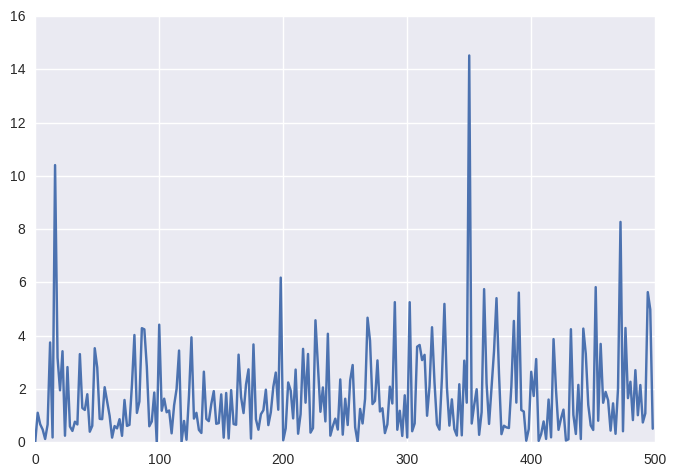

In [6]:
plt.plot (df_ukf[df_ukf.sensor_type=='lidar'].NIS)

In [7]:
df_ukf[df_ukf.sensor_type=='lidar'].NIS.std()

1.7591156217065853

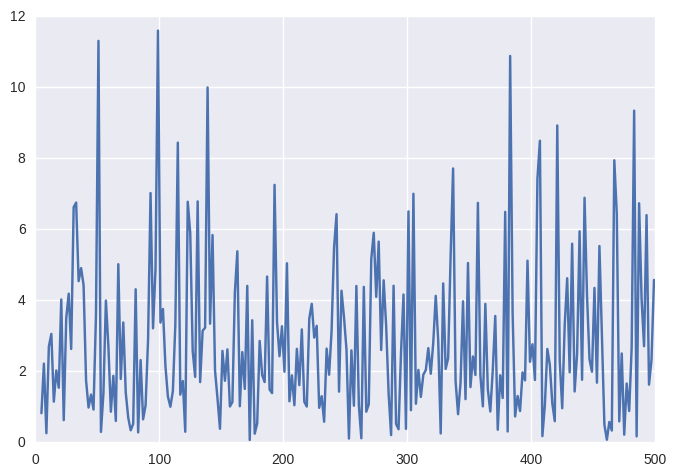

In [13]:
df_rad = df_ukf[df_ukf.sensor_type=='radar'].NIS
plt.plot (df_ukf[df_ukf.sensor_type=='radar']['NIS'].iloc[2:])

In [14]:
df_rad.ix[2:].std()

2.263014079821141

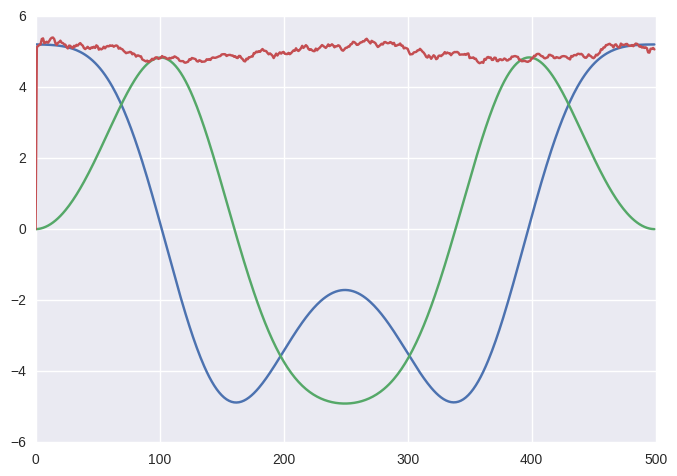

In [16]:
plt.plot (df_ukf.vx_ground_truth)
plt.plot (df_ukf.vy_ground_truth)
plt.plot (df_ukf.v_state)

In [43]:
df_ukf['v_ground_truth'] = np.sqrt(df_ukf.vx_ground_truth**2 + df_ukf.vy_ground_truth**2)
df_ekf['v_state'] = np.sqrt(df_ekf.vx_state**2 + df_ekf.vy_state**2)

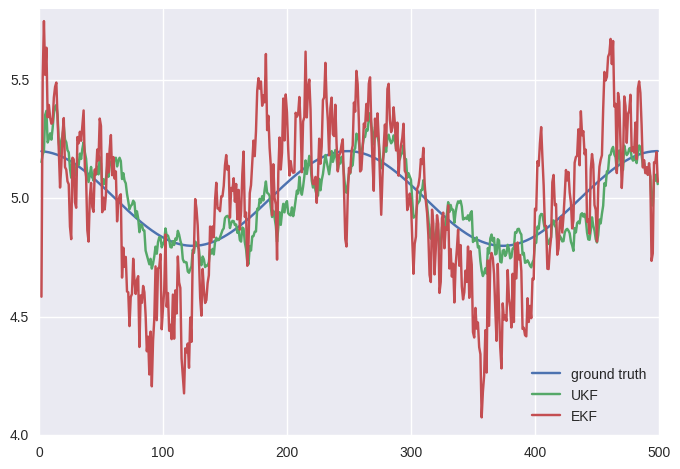

In [45]:
plt.plot (df_ukf.ix[2:, 'v_ground_truth'], label='ground truth')
plt.plot (df_ukf.ix[2:, 'v_state'], label='UKF')
plt.plot (df_ekf.ix[2:, 'v_state'], label='EKF')
plt.legend(loc=0)

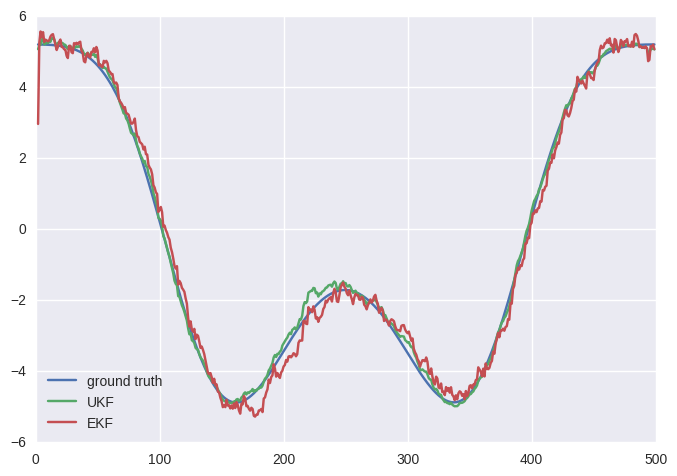

In [49]:
plt.plot (df_ukf.ix[2:, 'vx_ground_truth'], label='ground truth')
plt.plot (df_ukf.ix[2:, 'v_state'] * np.cos(df_ukf.ix[2:, 'yaw_angle_state']), label='UKF')
plt.plot (df_ekf.ix[2:, 'vx_state'], label='EKF')
plt.legend(loc=0)

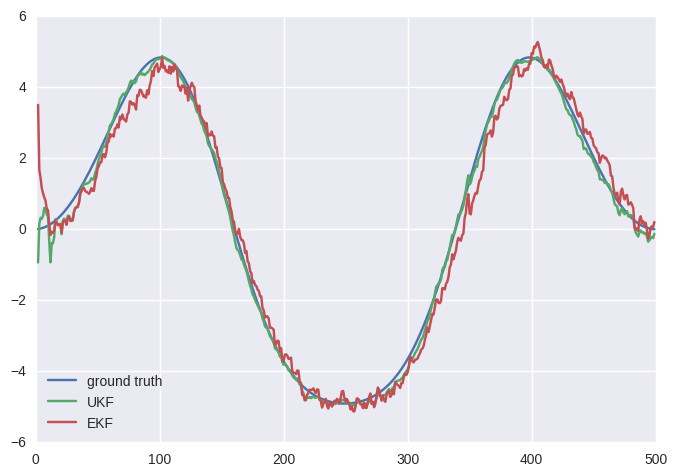

In [50]:
plt.plot (df_ukf.ix[2:, 'vy_ground_truth'], label='ground truth')
plt.plot (df_ukf.ix[2:, 'v_state'] * np.sin(df_ukf.ix[2:, 'yaw_angle_state']), label='UKF')
plt.plot (df_ekf.ix[2:, 'vy_state'], label='EKF')
plt.legend(loc=0)

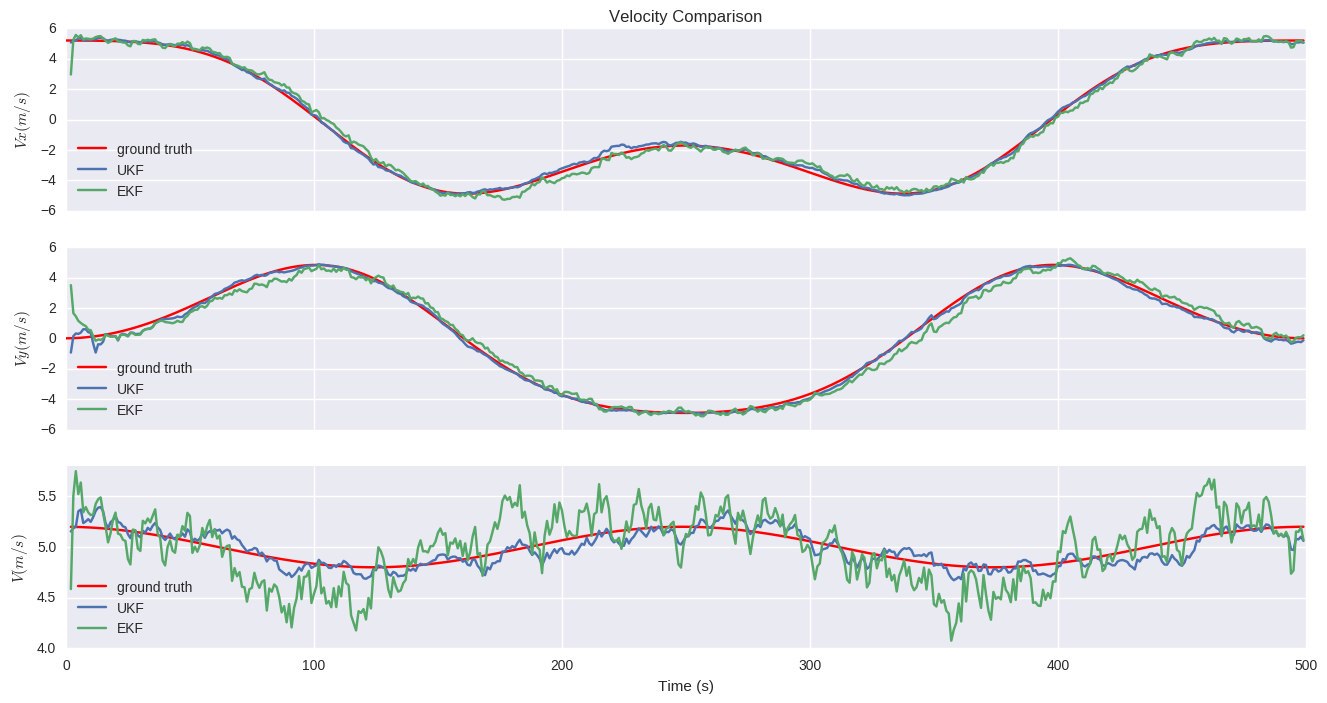

In [116]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharey=False, sharex=True, figsize=[16,8])
ax1.plot(df_ukf.vx_ground_truth, 'r', label='ground truth')
ax1.plot(df_ukf.ix[2:, 'v_state'] * np.cos(df_ukf.ix[2:, 'yaw_angle_state']), label='UKF')
ax1.plot(df_ekf.ix[2:, 'vx_state'], label='EKF')
ax1.legend(loc=0)
ax1.set_ylabel("$Vx (m/s)$")

ax2.plot(df_ukf.vy_ground_truth, 'r', label='ground truth')
ax2.plot(df_ukf.ix[2:, 'v_state'] * np.sin(df_ukf.ix[2:, 'yaw_angle_state']), label='UKF')
ax2.plot(df_ekf.ix[2:, 'vy_state'], label='EKF')
#plt.axis([0, 500, -8, 8])
ax2.legend(loc=0)
ax2.set_ylabel("$Vy (m/s)$")

ax3.plot (df_ukf.ix[2:, 'v_ground_truth'], 'r', label='ground truth')
ax3.plot (df_ukf.ix[2:, 'v_state'], label='UKF')
ax3.plot (df_ekf.ix[2:, 'v_state'], label='EKF')
ax3.legend(loc=0)
ax3.set_ylabel("$V (m/s)$")
ax3.set_xlabel("Time (s)")

ax1.set_title("Velocity Comparison")

In [56]:
df_a = df_ukf[['time_stamp', 'vx_ground_truth', 'vy_ground_truth', 'v_state', 'yaw_angle_state']]
df_a['vx_state'] = df_a.v_state * np.cos(df_a.yaw_angle_state)
df_a['vy_state'] = df_a.v_state * np.sin(df_a.yaw_angle_state)
df_a = df_a.diff()
df_a.time_stamp = df_a.time_stamp/1000000.0
df_a.head()

/home/arko/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/arko/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,time_stamp,vx_ground_truth,vy_ground_truth,v_state,yaw_angle_state,vx_state,vy_state
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.05,-0.00019,0.001797,5.12478,-1.275820e-17,5.124780,-6.538297e-17
2,0.05,-0.00032,0.003593,0.02869,-1.827570e-01,-0.057134,-9.365986e-01
3,0.05,-0.00045,0.005388,0.03253,2.112480e-01,0.116249,1.084333e+00
4,0.05,-0.00059,0.007182,0.01409,3.303360e-02,0.006356,1.719973e-01


In [70]:
df_ekf.columns

Index(['px_state', 'py_state', 'vx_state', 'vy_state', 'px_measured',
       'py_measured', 'px_ground_truth', 'py_ground_truth', 'vx_ground_truth',
       'vy_ground_truth', 'v_state'],
      dtype='object')

In [71]:
df_ekf['time_stamp'] = df_ukf.time_stamp
df_a_ekf = df_ekf[['time_stamp', 'vx_state', 'vy_state', 'vx_ground_truth', 'vy_ground_truth']].diff()
df_a_ekf.time_stamp = df_a_ekf.time_stamp/1000000.0
df_a_ekf.head()

,time_stamp,vx_state,vy_state,vx_ground_truth,vy_ground_truth
0,NaN,NaN,NaN,NaN,NaN
1,0.05,2.14624,3.95238,-0.00019,0.001797
2,0.05,0.81602,-0.45256,-0.00032,0.003593
3,0.05,2.28909,-1.84034,-0.00045,0.005388
4,0.05,0.31288,-0.21362,-0.00059,0.007182


(0, 15)

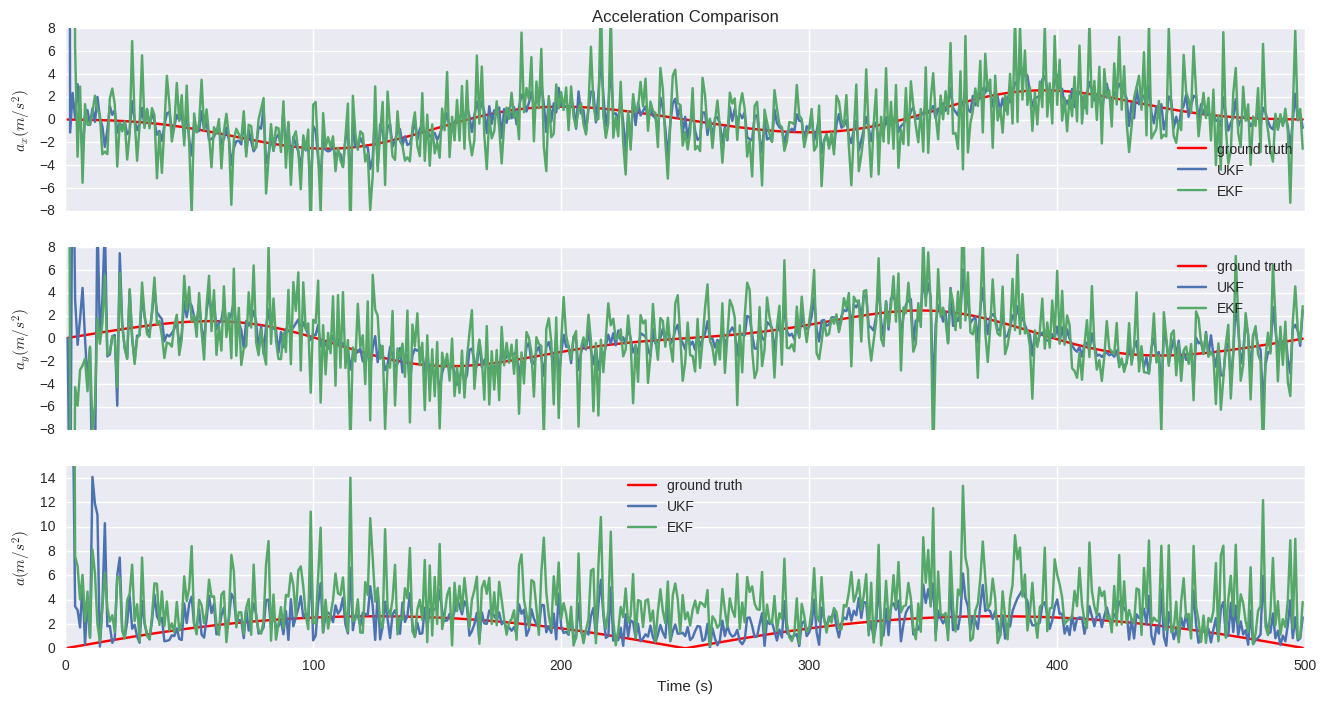

In [128]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=False, figsize=[16,8])
ax1.plot(df_a.vx_ground_truth/df_a.time_stamp, 'r', label='ground truth')
ax1.plot(df_a.vx_state/df_a.time_stamp, label='UKF')
ax1.plot(df_a_ekf.vx_state/df_a_ekf.time_stamp, label='EKF')
ax1.set_title("Acceleration Comparison")
ax1.set_ylabel("$a_x (m/s^2)$")
ax1.legend(loc=0)
ax1.set_ylim([-8, 8])

ax2.plot(df_a.vy_ground_truth/df_a.time_stamp, 'r', label='ground truth')
ax2.plot(df_a.vy_state/df_a.time_stamp, label='UKF')
ax2.plot(df_a_ekf.vy_state/df_a_ekf.time_stamp, label='EKF')
ax2.legend(loc=0)
ax2.set_ylabel("$a_y (m/s^2)$")
ax2.set_ylim([-8, 8])


ax3.plot(np.sqrt(df_a.vx_ground_truth**2 + df_a.vy_ground_truth**2)/df_a.time_stamp, 'r', label='ground truth')
ax3.plot(np.sqrt(df_a.vx_state**2 + df_a.vy_state**2)/df_a.time_stamp, label='UKF')
ax3.plot(np.sqrt(df_a_ekf.vx_state**2 + df_a_ekf.vy_state**2)/df_a.time_stamp, label='EKF')
ax3.legend(loc=0)
ax3.set_ylabel("$a (m/s^2)$")
ax3.set_xlabel("Time (s)")
ax3.set_ylim([0, 15])





In [19]:
df_a = df_ukf[['time_stamp', 'vx_ground_truth', 'vy_ground_truth']].diff()
df_a.time_stamp = df_a.time_stamp/1000000.0

In [20]:
df_a.head()

,time_stamp,vx_ground_truth,vy_ground_truth
0,NaN,NaN,NaN
1,0.05,-0.00019,0.001797
2,0.05,-0.00032,0.003593
3,0.05,-0.00045,0.005388
4,0.05,-0.00059,0.007182


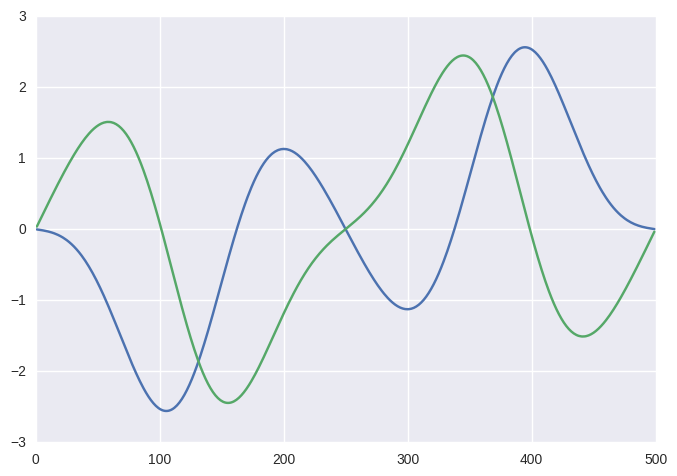

In [21]:
plt.plot(df_a.vx_ground_truth/df_a.time_stamp)
plt.plot(df_a.vy_ground_truth/df_a.time_stamp)

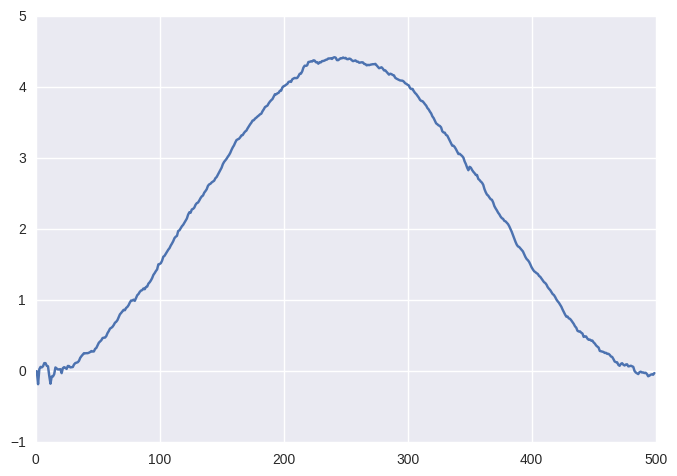

In [24]:
plt.plot(df_ukf.yaw_angle_state)

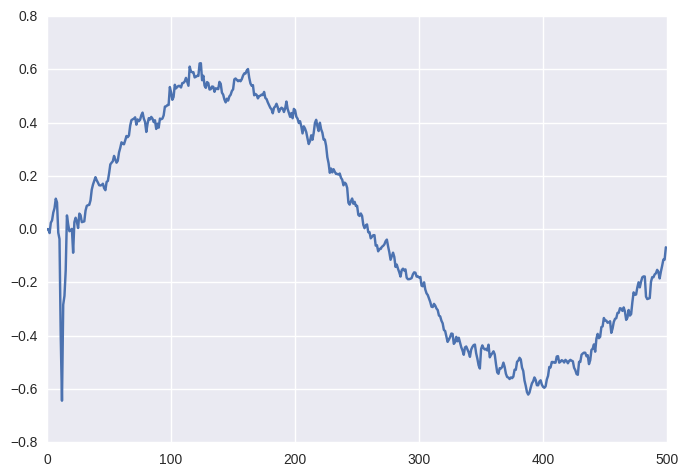

In [25]:
plt.plot (df_ukf.yaw_rate_state)